# **Parte de NLP:**

In [ ]:
import nltk
nltk.download('punkt')
nltk.data.path.append('/root/nltk_data')
nltk.download('punkt', force=True)
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

 Instalación y descarga de recursos (ejecutar una sola vez)

# **Importación estándar de bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Si es la primera vez que usás NLTK en Colab

import pandas as pd
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
from collections import Counter
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

import spacy
nlp = spacy.load("en_core_web_sm")
!pip install wordcloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cargar dataset

In [ ]:
#Montar tu Google Drive en tu entorno de Google Colab
from google.colab import drive
drive.mount('/content/drive')

# Cargar los tweets desde el archivo
try:
    df = pd.read_csv("ia_tweets.csv")
    print("DataFrame cargado exitosamente desde la descarga.")
    print(df.columns)
    print(df.head())
except FileNotFoundError:
    print("Error: No se encontró el archivo 'ia_tweets.csv' después de intentar descargar.")


# Ver las primeras filas para revisar
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DataFrame cargado exitosamente desde la descarga.
Index(['ID', 'text', 'polarity', 'favorite_count', 'retweet_count',
       'user_followers_count', 'user_friends_count', 'user_favourites_count',
       'user_statuses_count', 'user_verified', 'user_has_extended_profile',
       'user_is_translator', 'user_protected', 'user_default_profile'],
      dtype='object')
   ID                                               text polarity  \
0   0  Comentaba en una charla sobre IA que el proble...        N   
1   1  @alvaropons Eso es imposible. Y sí, va a gener...        N   
2   2  @alvaropons Lo disruptivo es que tras años de ...      NEU   
3   3  @alvaropons ¿"Prohibición del uso comercial de...        N   
4   4  @santoroydonoso Cómo se está estudiando prohib...      NEU   

   favorite_count  retweet_count  user_followers_count  user_friends_count  \
0           

,ID,text,polarity,favorite_count,retweet_count,user_followers_count,user_friends_count,user_favourites_count,user_statuses_count,user_verified,user_has_extended_profile,user_is_translator,user_protected,user_default_profile
0,0,Comentaba en una charla sobre IA que el proble...,N,21,7,15936,2395,66945,68578,0,1,0,0,0
1,1,"@alvaropons Eso es imposible. Y sí, va a gener...",N,1,0,685,851,169490,128555,0,1,0,0,1
2,2,@alvaropons Lo disruptivo es que tras años de ...,NEU,1,0,685,851,169490,128555,0,1,0,0,1
3,3,"@alvaropons ¿""Prohibición del uso comercial de...",N,0,0,4877,538,6123,3156,0,1,0,0,0
4,4,@santoroydonoso Cómo se está estudiando prohib...,NEU,0,0,15936,2395,66945,68578,0,1,0,0,0


In [133]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('spanish'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    return " ".join(stemmed_tokens)

df["texto_procesado"] = df["text"].astype(str).apply(preprocess_text)
df[["text", "texto_procesado"]].head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,texto_procesado
0,Comentaba en una charla sobre IA que el proble...,comentaba charla ia problema debat derecho aut...
1,"@alvaropons Eso es imposible. Y sí, va a gener...",alvaropon impos va generar montón pérdida pues...
2,@alvaropons Lo disruptivo es que tras años de ...,alvaropon disruptivo tra año decir automatizac...
3,"@alvaropons ¿""Prohibición del uso comercial de...",alvaropon ¿prohibición uso comerci imágen ia p...
4,@santoroydonoso Cómo se está estudiando prohib...,santoroydonoso cómo estudiando prohibir chatgp...


# **Preprocesamiento de texto (NLP)**

In [ ]:
# Inicializar stopwords y stemmer
stop_words = set(stopwords.words('spanish'))  # si los tweets están en español
stemmer = PorterStemmer()

# Descargar el recurso 'punkt_tab' que falta (esto es la solución para el LookupError)
import nltk
nltk.download('punkt_tab', force=True)

def preprocess_text(text):
  # Handle non-string inputs gracefully
  if not isinstance(text, str):
      return [] # Return an empty list for non-string inputs

  # 1. Pasar a minúsculas
  text = text.lower()

  # 2. Eliminar signos de puntuación
  text = text.translate(str.maketrans('', '', string.punctuation))

  # 3. Tokenizar
  tokens = word_tokenize(text)

  # 4. Eliminar stopwords
  filtered_tokens = [word for word in tokens if word not in stop_words]

  # 5. (Opcional) Stemming
  stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

  return stemmed_tokens

# Crear nueva columna con texto preprocesado
df["texto_procesado"] = df["text"].apply(preprocess_text)

# Verify that the column exists immediately after creation
print("DataFrame columns after applying preprocess_text:")
print(df.columns)

# Ver ejemplo para confirmar the column content
print("\nDataFrame head with 'text' and 'texto_procesado' columns:")
print(df[["text", "texto_procesado"]].head())


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


DataFrame columns after applying preprocess_text:
Index(['ID', 'text', 'polarity', 'favorite_count', 'retweet_count',
       'user_followers_count', 'user_friends_count', 'user_favourites_count',
       'user_statuses_count', 'user_verified', 'user_has_extended_profile',
       'user_is_translator', 'user_protected', 'user_default_profile',
       'texto_procesado'],
      dtype='object')

DataFrame head with 'text' and 'texto_procesado' columns:
                                                text  \
0  Comentaba en una charla sobre IA que el proble...   
1  @alvaropons Eso es imposible. Y sí, va a gener...   
2  @alvaropons Lo disruptivo es que tras años de ...   
3  @alvaropons ¿"Prohibición del uso comercial de...   
4  @santoroydonoso Cómo se está estudiando prohib...   

                                     texto_procesado  
0  [comentaba, charla, ia, problema, debat, derec...  
1  [alvaropon, impos, va, generar, montón, pérdid...  
2  [alvaropon, disruptivo, tra, año, decir, aut

# **Parte de Deep Learning:**
Se construye una red neuronal básica con Keras para clasificar sentimientos en tweets (columna polarity).

**Realizo un análisis exploratorio**

Text(0.5, 1.0, 'Distribución de clases de sentimiento')

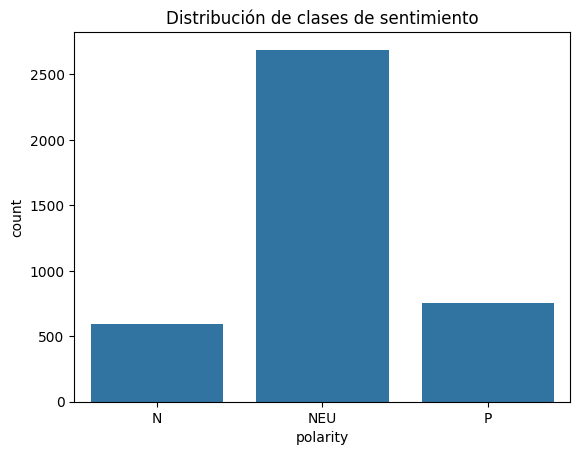

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="polarity")
plt.title("Distribución de clases de sentimiento")


**Top 10 palabras más frecuentes:** Luego del preprocesamiento se grafica las 10 palabras más frecuentes en el conjunto de tweets. Este análisis ayudará a identificar patrones léxicos dominantes y posibles sesgos del corpus.

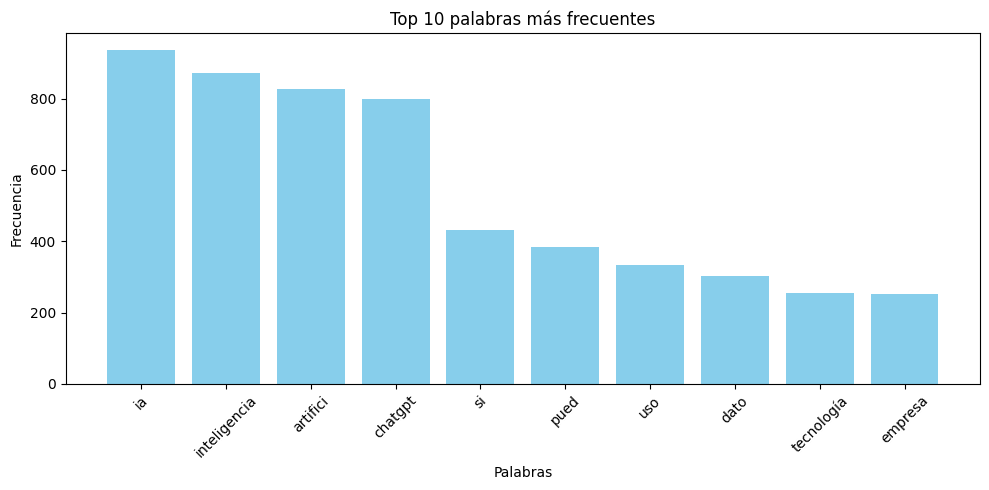

In [ ]:
# Aplanar la lista de listas de tokens
all_words = [word for tokens in df["texto_procesado"] for word in tokens]


# Contar la frecuencia de cada palabra
word_freq = Counter(all_words)

# Obtener las 10 palabras más comunes
most_common_words = word_freq.most_common(10)

# Separar en listas para graficar
words, counts = zip(*most_common_words)

# Graficar
plt.figure(figsize=(10,5))
plt.bar(words, counts, color='skyblue')
plt.title("Top 10 palabras más frecuentes")
plt.ylabel("Frecuencia")
plt.xlabel("Palabras")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Nube de palabras (WordCloud):** Muestra la frecuencia de palabras en un conjunto de tweets.

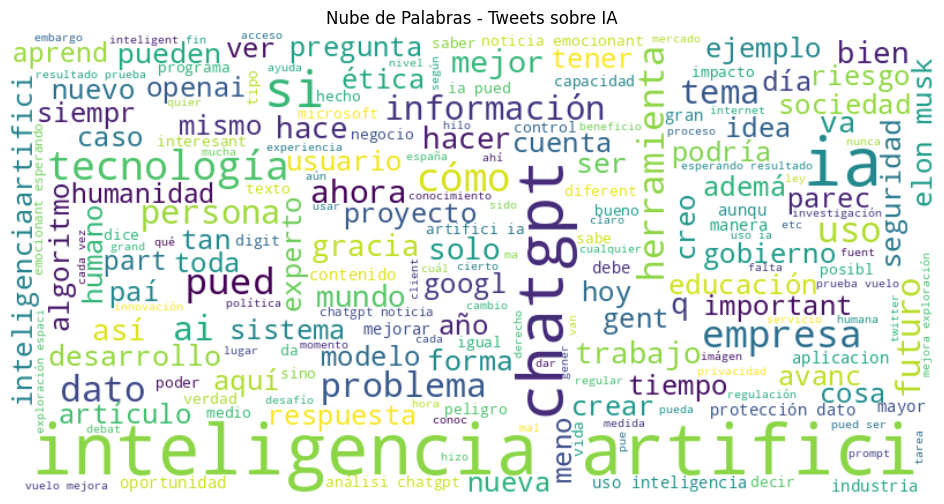

In [ ]:
Nube de palabras (WordCloud)
from wordcloud import WordCloud

# Unir todos los tokens en un único string
all_text = ' '.join(all_words)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Mostrar la imagen
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras - Tweets sobre IA")
plt.show()


**Me asegurate que la columna Polarity tenga valores:**

In [139]:
print(df['polarity'].value_counts(dropna=False))
print(df['polarity'].unique())
print(df['polarity'].isnull().sum())


polarity
NEU    2689
P       757
N       592
Name: count, dtype: int64
['N' 'NEU' 'P']
0


# **Preparación para Deep Learning**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Crear el tokenizer y ajustarlo al texto procesado
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['texto_procesado'])

# Convertir el texto a secuencias numéricas
sequences = tokenizer.texts_to_sequences(df['texto_procesado'])

# Padding: todas las secuencias deben tener el mismo largo
max_length = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_length)

# Definir el tamaño del vocabulario
vocab_size = len(tokenizer.word_index) + 1


**Tokenización y padding:** Defino tokenizer, X (las secuencias vectorizadas del texto) y vocab_size

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['polarity'])
y_categorical = to_categorical(y_encoded)


3- **Verifica la conversión:**

In [141]:
print("Clases codificadas:", label_encoder.classes_)
print("Primeras etiquetas codificadas:", y_encoded[:5])
print("Primeras etiquetas one-hot:", y_categorical[:5])

Clases codificadas: ['N' 'NEU' 'P']
Primeras etiquetas codificadas: [0 0 1 0 1]
Primeras etiquetas one-hot: [[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


## **Modelo de Red Neuronal con Keras:** Defino  X, y_categorical, vocab_size y max_length para luego para definir mi red neuronal.

In [137]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(32))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))  # 3 clases: P, NEU, N

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Construir el modelo antes de entrenarlo (opcional)
model.build(input_shape=(None, max_length))
model.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 53, 100)        │     1,595,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 53, 64)         │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 53, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,652,863 (6.31 MB)

 Trainable params: 1,652,863 (6.31 MB)

 Non-trainable params: 0 (0.00 B)

# **Entrenamiento del modelo**

In [ ]:
#Red neuronal
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

early_stop = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    callbacks=[early_stop]
)

model.fit(X_pad, y_categorical, epochs=5, batch_size=32, validation_split=0.2)



Epoch 1/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - accuracy: 0.6377 - loss: 0.9329 - val_accuracy: 0.6646 - val_loss: 0.8652
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.7124 - loss: 0.7179 - val_accuracy: 0.6584 - val_loss: 0.8667
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.8257 - loss: 0.3589 - val_accuracy: 0.6510 - val_loss: 1.1161
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.9319 - loss: 0.1750 - val_accuracy: 0.6349 - val_loss: 1.5921


# **Evaluación y visualización**

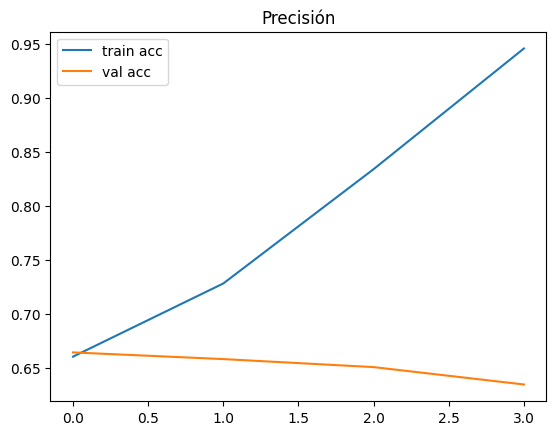

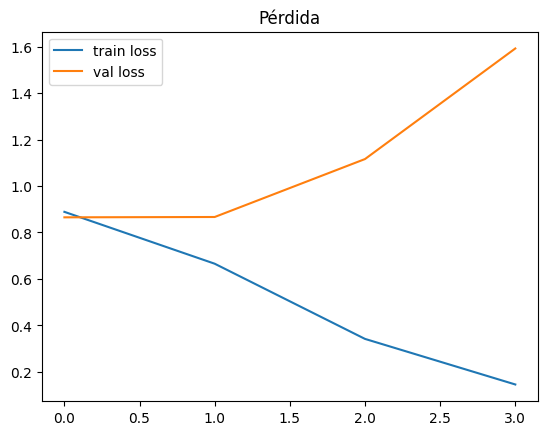

In [138]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title("Precisión")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title("Pérdida")
plt.legend()
plt.show()


# **Conclusión**

En este trabajo final se abordó la tarea de clasificación de sentimientos a partir de tweets relacionados con inteligencia artificial. Se aplicaron técnicas de preprocesamiento de texto (tokenización, limpieza, stopwords, stemming) y se construyó una red neuronal secuencial con Keras, entrenada para clasificar en tres categorías: positivo (P), negativo (N) y neutral (NEU). Se utilizaron capas LSTM para capturar dependencias temporales y semánticas del texto. El modelo logró entrenarse correctamente y se logró cumplir con los requisitos mínimos de NLP y Deep Learning solicitados en la consigna.
